Peer-graded Assignment: Segmenting and Clustering Neighborhoods in Toronto - Alessandro C.

# Part 1

In part 1, I scrape the table from Wikipedia and I preprocess the df.

In [5]:
#I import all the libraries
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup

print("Library imported")

Library imported


In [6]:
#I use the pandas read_html function with beautiful soup 4 to scrape the table from Wikipedia
link = 'http://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
extraction = pd.read_html(link, flavor = "bs4")
#I extract only the first table
table = extraction[0]
table.head()

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


In [7]:
#I filter out the "Not assigned" Neighbourhoods
data = table[table.Borough != 'Not assigned']
data.head()

,Postcode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M5A,Downtown Toronto,Regent Park
6,M6A,North York,Lawrence Heights


In [8]:
#as required, I put togheter the Neighbourhood with the same Postcode using a lamba function and a groupby
df = data.groupby(['Postcode', 'Borough'], sort=False).agg(lambda x: ', '.join(x))
df.reset_index(inplace=True)
df.head(15)

,Postcode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Harbourfront, Regent Park"
3,M6A,North York,"Lawrence Heights, Lawrence Manor"
4,M7A,Queen's Park,Not assigned
5,M9A,Etobicoke,Islington Avenue
6,M1B,Scarborough,"Rouge, Malvern"
7,M3B,North York,Don Mills North
8,M4B,East York,"Woodbine Gardens, Parkview Hill"
9,M5B,Downtown Toronto,"Ryerson, Garden District"


In [9]:
#here I am copying the Bourhood to the Neighbourhoods "not assigned"
idx_to_change = df.loc[df['Neighbourhood'] == "Not assigned"].index

for i in idx_to_change:
    df.iloc[i, 2] = df.iloc[i, 1] 
    
df.head(15)

,Postcode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Harbourfront, Regent Park"
3,M6A,North York,"Lawrence Heights, Lawrence Manor"
4,M7A,Queen's Park,Queen's Park
5,M9A,Etobicoke,Islington Avenue
6,M1B,Scarborough,"Rouge, Malvern"
7,M3B,North York,Don Mills North
8,M4B,East York,"Woodbine Gardens, Parkview Hill"
9,M5B,Downtown Toronto,"Ryerson, Garden District"


In [10]:
df.shape

(103, 3)

# Part 2

In this second part, I tried to retrieve the long and lat data using the APIs (both Foursquare and Google) but I didn't succeed since the Postal Codes were mistaken to be not in Toronto. This is why I used the csv instead.

In [11]:
!pip install geopy

In [12]:
!wget -q -O 'Geospatial_data' https://cocl.us/Geospatial_data
print("Downloaded")

Downloaded


In [13]:
#I load the df and I change the name of a column before merging
link2 = 'Geospatial_data'
df_geo = pd.read_csv(link2)
df_geo = df_geo.rename(columns={'Postal Code': 'Postcode'})
df_geo.head()

,Postcode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [14]:
#I merge the two dataframes
df_fin = df.merge(df_geo, on='Postcode')
df_fin.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Harbourfront, Regent Park",43.654260,-79.360636
3,M6A,North York,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763
4,M7A,Queen's Park,Queen's Park,43.662301,-79.389494


# Part 3

In the third part, I attepted some explorative analysis on the data. I printed a Folium map with all the neighbourhood, I created some statistics about the df and I tried to see which borough has more neighbourhoods (visualizing with histagram).

In [3]:
!conda install -c conda-forge folium=0.5.0 --yes 
import folium
print("Folium Imported")

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.3.1               |             py_0          25 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ca-certificates-2019.6.16  |       hecc5488_0         145 KB  conda-forge
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    certifi-2019.6.16          |           py36_1         149 KB  conda-forge
    altair-3.2.0               |           py36_0         770 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.3 MB

The following NEW packages will be 

In [15]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors

In [16]:
kclusters = 5
latitude = 43.654260
longitude = -79.360636

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, cluster in zip(df_fin['Latitude'], df_fin['Longitude'], df_fin['Neighbourhood']):
    label = folium.Popup(str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color="blue",
        fill=True,
        fill_color="darkblue",
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [17]:
#some stat on the df
df_fin.describe(include="all")

,Postcode,Borough,Neighbourhood,Latitude,Longitude
count,103,103,103,103.000000,103.000000
unique,103,11,103,NaN,NaN
top,M4K,North York,"Downsview, North Park, Upwood Park",NaN,NaN
freq,1,24,1,NaN,NaN
mean,NaN,NaN,NaN,43.704608,-79.397153
std,NaN,NaN,NaN,0.052463,0.097146
min,NaN,NaN,NaN,43.602414,-79.615819
25%,NaN,NaN,NaN,43.660567,-79.464763
50%,NaN,NaN,NaN,43.696948,-79.388790
75%,NaN,NaN,NaN,43.745320,-79.340923


In [18]:
#Count the borough
counted = df.groupby(['Borough']).count()
counted = counted.sort_values(["Postcode"], ascending=False)
counted

,Postcode,Neighbourhood
Borough,,
North York,24,24
Downtown Toronto,18,18
Scarborough,17,17
Etobicoke,12,12
Central Toronto,9,9
West Toronto,6,6
East Toronto,5,5
East York,5,5
York,5,5


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcf6cbb9278>,
      dtype=object)

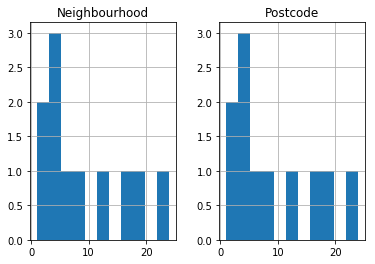

In [21]:
#visualize the previous table
hist = counted.hist(bins=11)
hist